<img src="Header.png" alt="Python Cientifico de" style="width: 1000px;"/>

# Cálculo de Transformadas rápidas de Fourier con SciPy

## Transformadas discretas de Fourier 1-D

La FFT y [k] de longitud de la longitudla secuencia x [n] se define como

y la transformación inversa se define de la siguiente manera



Estas transformaciones pueden calcularse mediante ffty ifft, respectivamente, como se muestra en el siguiente ejemplo.

In [1]:
import numpy as np

In [3]:
from scipy import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [4]:
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

#### Ejemplo del cálculo de la FFT de la suma de dos funciones senos.


In [7]:
from scipy import fft
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

In [9]:
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

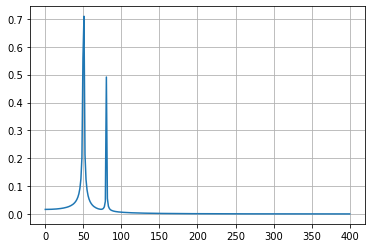

In [10]:
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

La señal de entrada FFT está inherentemente truncada. Este truncamiento puede modelarse como una multiplicación de una señal infinita con una función de ventana rectangular. En el dominio espectral, esta multiplicación se convierte en convolución del espectro de señal con el espectro de función de ventana, siendo de forma $sin(x)/x$. 

Esta convolución es la causa de un efecto llamado fuga espectral (ver [WPW] ). 

La ventana de la señal con una función de ventana dedicada ayuda a mitigar la fuga espectral. 

El siguiente ejemplo utiliza una ventana Blackman de scipy.signal y muestra el efecto de la ventana (el componente cero de la FFT se ha truncado con fines ilustrativos).

___(La ventana Blackman es un cono formado mediante el uso de los primeros tres términos de una suma de cosenos. Fue diseñado para tener cerca de la mínima fuga posible. 
La mayoría de las referencias a la ventana Blackman provienen de la literatura de procesamiento de señales, donde se utiliza como una de las muchas funciones de ventanas para suavizar los valores. También se conoce como apodización (que significa "quitar el pie", es decir, suavizar las discontinuidades al principio y al final de la señal muestreada) o función de disminución gradual.)___

In [13]:
# Importamos la fft
from scipy import fft

In [14]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

In [15]:
# Importamos blackman
from scipy.signal import blackman

In [16]:
w = blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

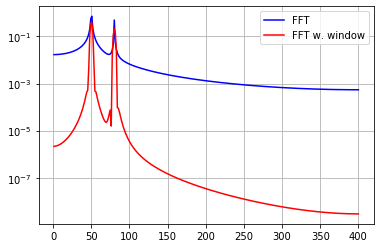

In [17]:
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

### Transformación Coseno Discreta

SciPy proporciona un DCT con la función dcty un IDCT correspondiente con la función idct.

El DCT exhibe la "propiedad de compactación de energía", lo que significa que para muchas señales solo los primeros coeficientes DCT tienen una magnitud significativa. 
Poner a cero los otros coeficientes conduce a un pequeño error de reconstrucción, un hecho que se explota en la compresión de señal con pérdida (por ejemplo, compresión JPEG).

El siguiente ejemplo muestra una señal $x$ y dos reconstrucciones ($x_{20}$ y $x_{15}$) de los coeficientes DCT de la señal. 

La señal se reconstruye a partir de los primeros 20 coeficientes DCT, $x_{15}$ se reconstruye a partir de los primeros 15 coeficientes DCT. Se puede ver que el error relativo de usar 20 coeficientes sigue siendo muy pequeño (~ 0.1%), pero proporciona una tasa de compresión de cinco veces.

In [18]:
from scipy import dct, idct

ImportError: cannot import name 'dct' from 'scipy' (/opt/anaconda3/lib/python3.7/site-packages/scipy/__init__.py)

In [19]:
import matplotlib.pyplot as plt

In [20]:
N = 100
t = np.linspace(0,20,N)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

NameError: name 'dct' is not defined

In [ ]:
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

In [ ]:
plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.show()